<a href="https://colab.research.google.com/github/Harshini-19-git/projects/blob/main/Car%20price%20predict/ML%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dataset

In [1]:

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Cardetails.csv')
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.shape

(8128, 13)

In [5]:
#compared to given columns..ignoring torque make much sense

In [6]:
df.drop(columns=['torque'],inplace=True)

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [8]:
df.shape

(8128, 12)

**PREPROCESSING**....1) handling NULLS 2)DUPLICATES

In [9]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [10]:
#as huge dataset---> we are dropping these records

In [11]:
df.dropna(inplace=True)
print(df.shape)

(7907, 12)


In [12]:
df.drop_duplicates(inplace=True)
print(df.shape)

(6718, 12)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   object 
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   object 
 6   transmission   6718 non-null   object 
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6718 non-null   object 
 11  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 682.3+ KB


**DATA ANALYSIS**

In [14]:
for col in df.columns:
  print('unique values of '+ col)
  print(df[col].unique()) #remove () to get count of unique val in each col

unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  1025000
   235000  1700000  1200000   610000  2500000   484999   315000  

here kmpl->liq fuel
kmpg->LPG


**MODIFYING POSSIBILITIES IN EACH COL**

1)Extracting brand names from given car model names & making them as categories
2)ignoring UNITS in milage & engine & max power

.
.
Converting CATEGORICAL to NUMERICAL

In [15]:
def get_brand_name(car_name):
  car_name=car_name.split(' ')[0]
  return car_name.strip()

In [16]:
import numpy as np

def clean_data(value):
  value = value.split(' ')[0]
  value=value.strip()
  if value == '':
    return 0
  return float(value)

In [17]:
get_brand_name('Maruti Suzuki')

'Maruti'

In [18]:
df['name']=df['name'].apply(get_brand_name)


In [19]:
df['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [20]:
df['mileage'] = df['mileage'].apply(clean_data)
df['engine'] = df['engine'].apply(clean_data)
df['max_power'] = df['max_power'].apply(clean_data)

df.dropna(inplace=True)

In [21]:
for col in df.columns:
  print('unique values of '+ col)
  print(df[col].unique()) #remove () to get count of unique val in each col
  print('==============================')
print(df['name'].unique().size)

unique values of name
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2019 2008 2020 1999 2000 2003 2004 1994 1998 1997 1995 1996]
unique values of selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000   730000   650000   330000   366000
  1149000   425000  2100000   925000   675000   819999   390000  1500000
   700000  1450000  1090000   850000  1650000  1750000  1590000  1689999
  1425000   265000   190000   630000   540000   448000   745000  10250

In [22]:
df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault', 'Mahindra',
 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Audi',
 'Volkswagen', 'BMW', 'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
 'Kia', 'Fiat', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],inplace=True
)

/tmp/ipython-input-22-3367313524.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].replace(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault', 'Mahindra',
/tmp/ipython-input-22-3367313524.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['name'].replace(['Maruti', 

In [23]:
df['name'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [24]:
df['transmission'].replace(['Manual', 'Automatic'],[1, 2],inplace=True)

/tmp/ipython-input-24-2819781403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transmission'].replace(['Manual', 'Automatic'],[1, 2],inplace=True)
/tmp/ipython-input-24-2819781403.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission'].replace(['Manual', 'Automatic'],[1, 2],

In [25]:
df['seller_type'].replace(['Individual' ,'Dealer', 'Trustmark Dealer'],[1, 2,3],inplace=True)

/tmp/ipython-input-25-2466859759.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seller_type'].replace(['Individual' ,'Dealer', 'Trustmark Dealer'],[1, 2,3],inplace=True)
/tmp/ipython-input-25-2466859759.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['seller_type'].replace(['Individu

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   object 
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 682.3+ KB


In [27]:
df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)

/tmp/ipython-input-27-140813953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)
/tmp/ipython-input-27-140813953.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6718 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6718 non-null   int64  
 1   year           6718 non-null   int64  
 2   selling_price  6718 non-null   int64  
 3   km_driven      6718 non-null   int64  
 4   fuel           6718 non-null   int64  
 5   seller_type    6718 non-null   int64  
 6   transmission   6718 non-null   int64  
 7   owner          6718 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6718 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 682.3+ KB


In [29]:
df.reset_index(inplace=True)

In [30]:
df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner',
 'Test Drive Car'],[1,2,3,4,5],inplace=True)

/tmp/ipython-input-30-666313874.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner',
/tmp/ipython-input-30-666313874.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owner'].replace(['First Owner', 'Seco

In [31]:
df.drop(columns=['index'],inplace=True)


In [32]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,2,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,3,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,4,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,1,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6713,1,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6714,4,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6715,4,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6716,4,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [33]:
#deciding inut and output of the model
input_data=df.drop(columns=['selling_price'])
output_data=df['selling_price']

**FIT & TRANSFORM**

In [34]:
#splitting into train and test data sets ...20% to test 80% train
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Scaling
scaler = StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=2)
X_train_scaled = scaler.fit_transform(x_train)  # Learn & apply on train
X_test_scaled = scaler.transform(x_test)        # Apply same params on test

In [35]:
lr_model=LinearRegression() #model creation

In [36]:
lr_model.fit(X_train_scaled,y_train) #training model

LinearRegression()

In [37]:
lr_predicted=lr_model.predict(X_test_scaled)

In [38]:
lr_predicted

array([  19002.75156825,  277784.02096804,  274126.9312815 , ...,
        620388.55667228, 1217208.4338014 , 1708355.52243378])

In [39]:
x_train.head(1)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
2961,8,2018,24000,1,2,1,1,15.1,2179.0,152.87,7.0


In [40]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [65]:
example_input=pd.DataFrame([8,2025,2,1,1,1,1,18.99,1200.0,109.96,5.0],['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

In [42]:
lr_model.predict(example_input.T)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-2.10508766e+08])

**ANALYSIS::   
more kms driven ==> price decreses ,,,
latest model===>price increased,,,,,,Mileage is linked to engine size and power, not price alone.

Expensive cars (luxury SUVs, sedans) often have powerful engines → low mileage.

Budget cars → smaller engines → higher mileage, but lower price.
**

Shape: (8128, 12)
Columns: ['year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats', 'brand']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  seats          7907 non-null   float64
 11  brand          8128 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB
None
              year  selling_price     km_d

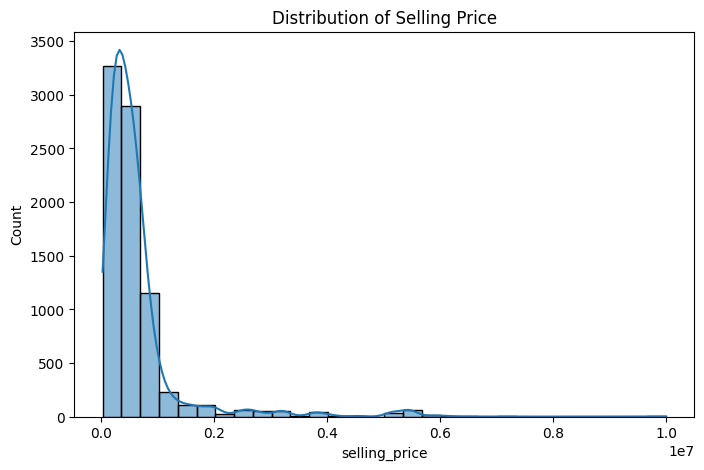

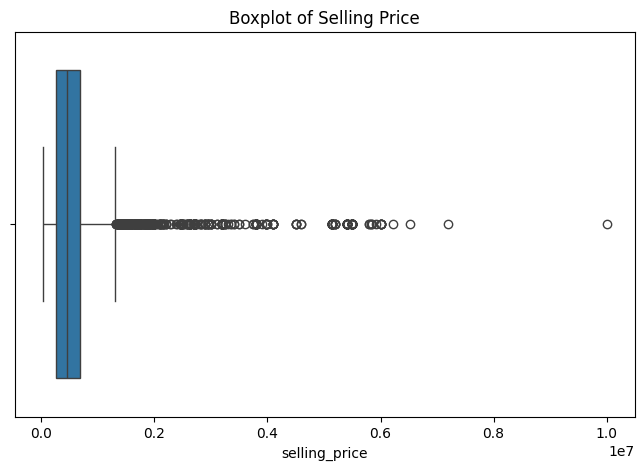

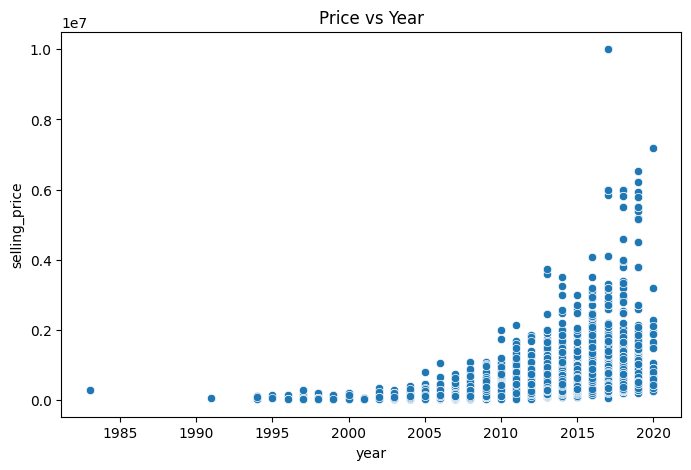

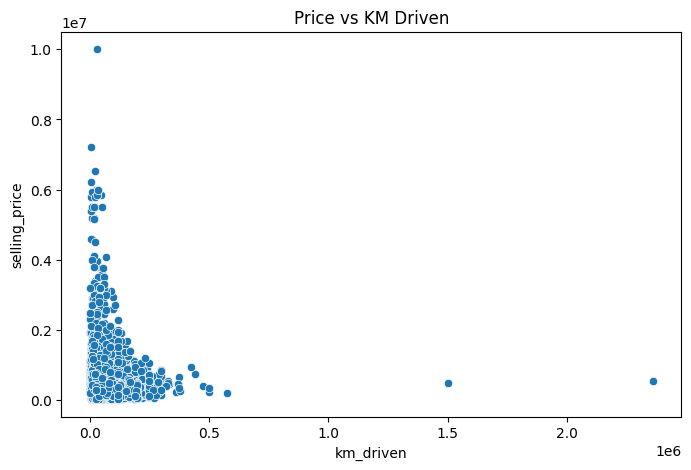

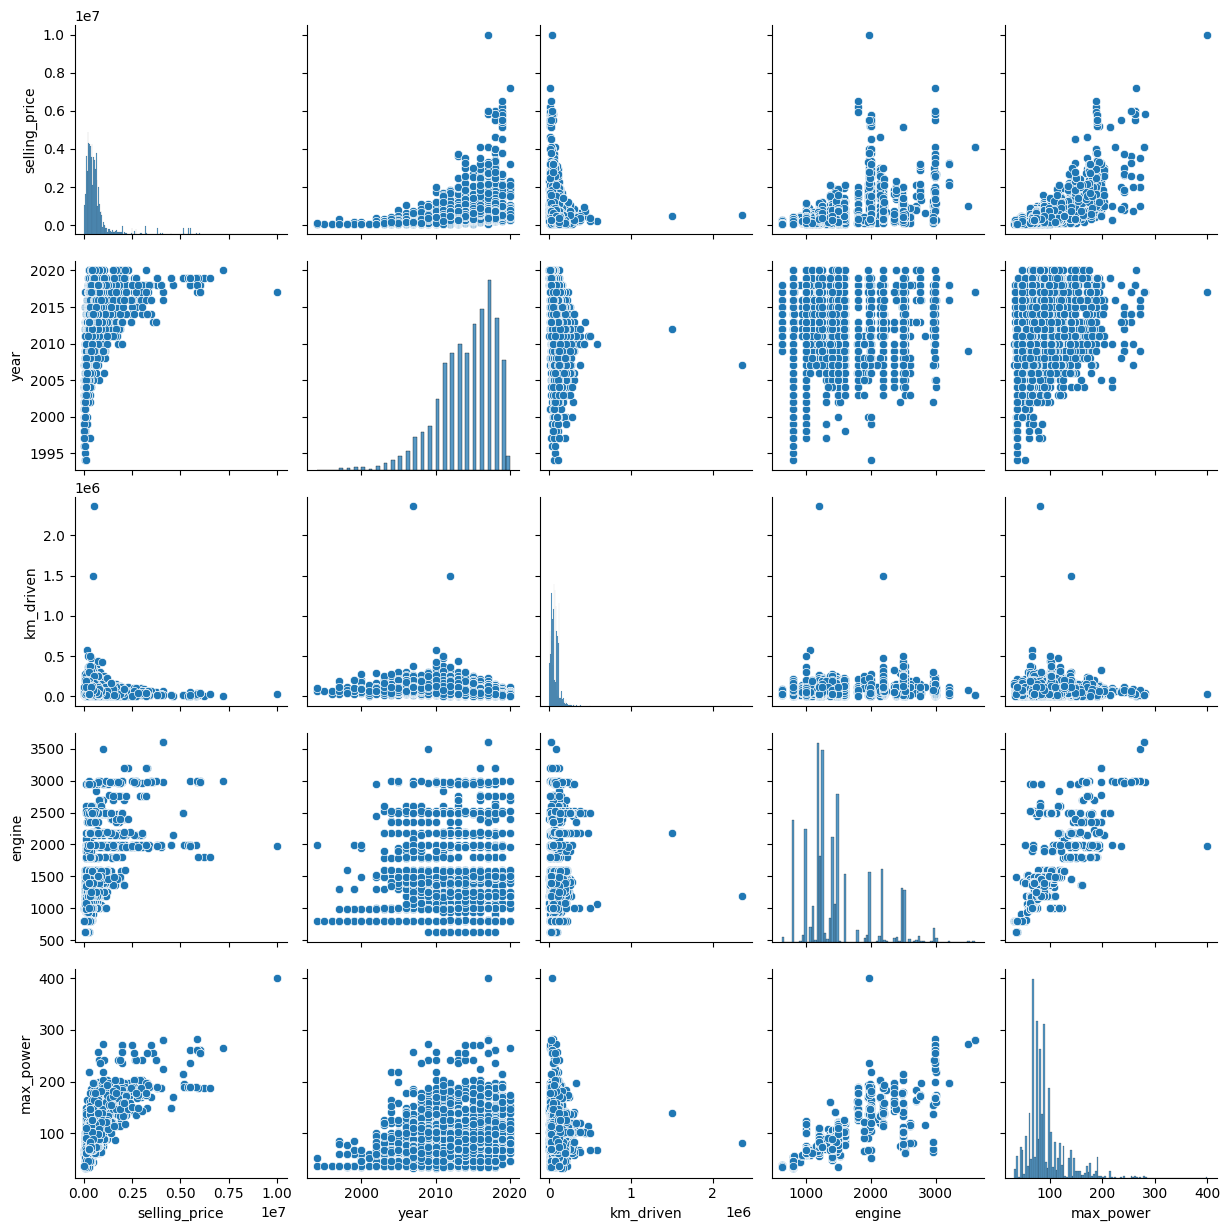

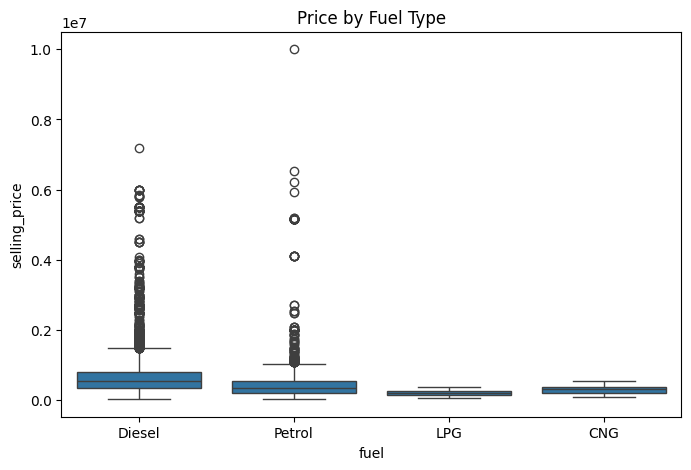

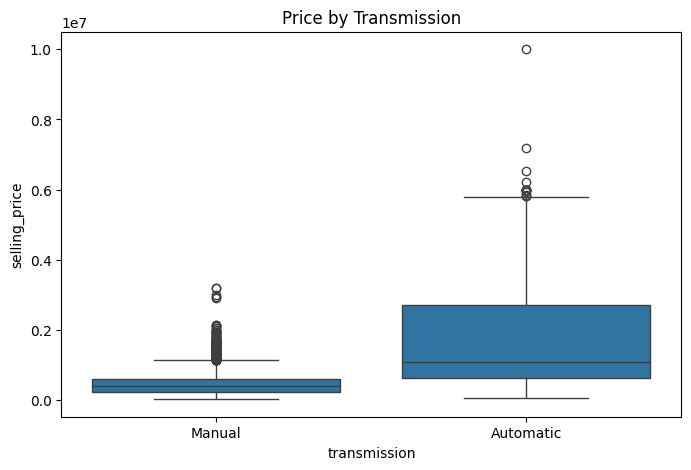

ValueError: could not convert string to float: '23.4 kmpl'

In [70]:
# Install dependencies (if running in Colab)
!pip install seaborn matplotlib pandas

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ---- Basic Info ----
print(df.info())
print(df.describe())

# Convert numeric-like columns if needed
for col in ['year', 'km_driven', 'selling_price', 'engine', 'max_power']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.extract(r'([\d.]+)')[0], errors='coerce')

# ---- 1. Distribution Analysis ----
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.show()

# Boxplot for Selling Price
plt.figure(figsize=(8,5))
sns.boxplot(x=df['selling_price'])
plt.title('Boxplot of Selling Price')
plt.show()

# ---- 2. Relationship Analysis ----
if 'year' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='year', y='selling_price', data=df)
    plt.title('Price vs Year')
    plt.show()

if 'km_driven' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='km_driven', y='selling_price', data=df)
    plt.title('Price vs KM Driven')
    plt.show()

# Pairplot for key numerical features
num_cols = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power']
num_cols = [col for col in num_cols if col in df.columns]
sns.pairplot(df[num_cols].dropna())
plt.show()

# ---- 3. Category vs Numeric ----
if 'fuel' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='fuel', y='selling_price', data=df)
    plt.title('Price by Fuel Type')
    plt.show()

if 'transmission' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='transmission', y='selling_price', data=df)
    plt.title('Price by Transmission')
    plt.show()

# ---- 4. Correlation Heatmap ----
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ---- 5. Count Analysis ----
if 'fuel' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='fuel', data=df)
    plt.title('Count of Cars by Fuel Type')
    plt.show()

if 'seller_type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='seller_type', data=df)
    plt.title('Count of Cars by Seller Type')
    plt.show()


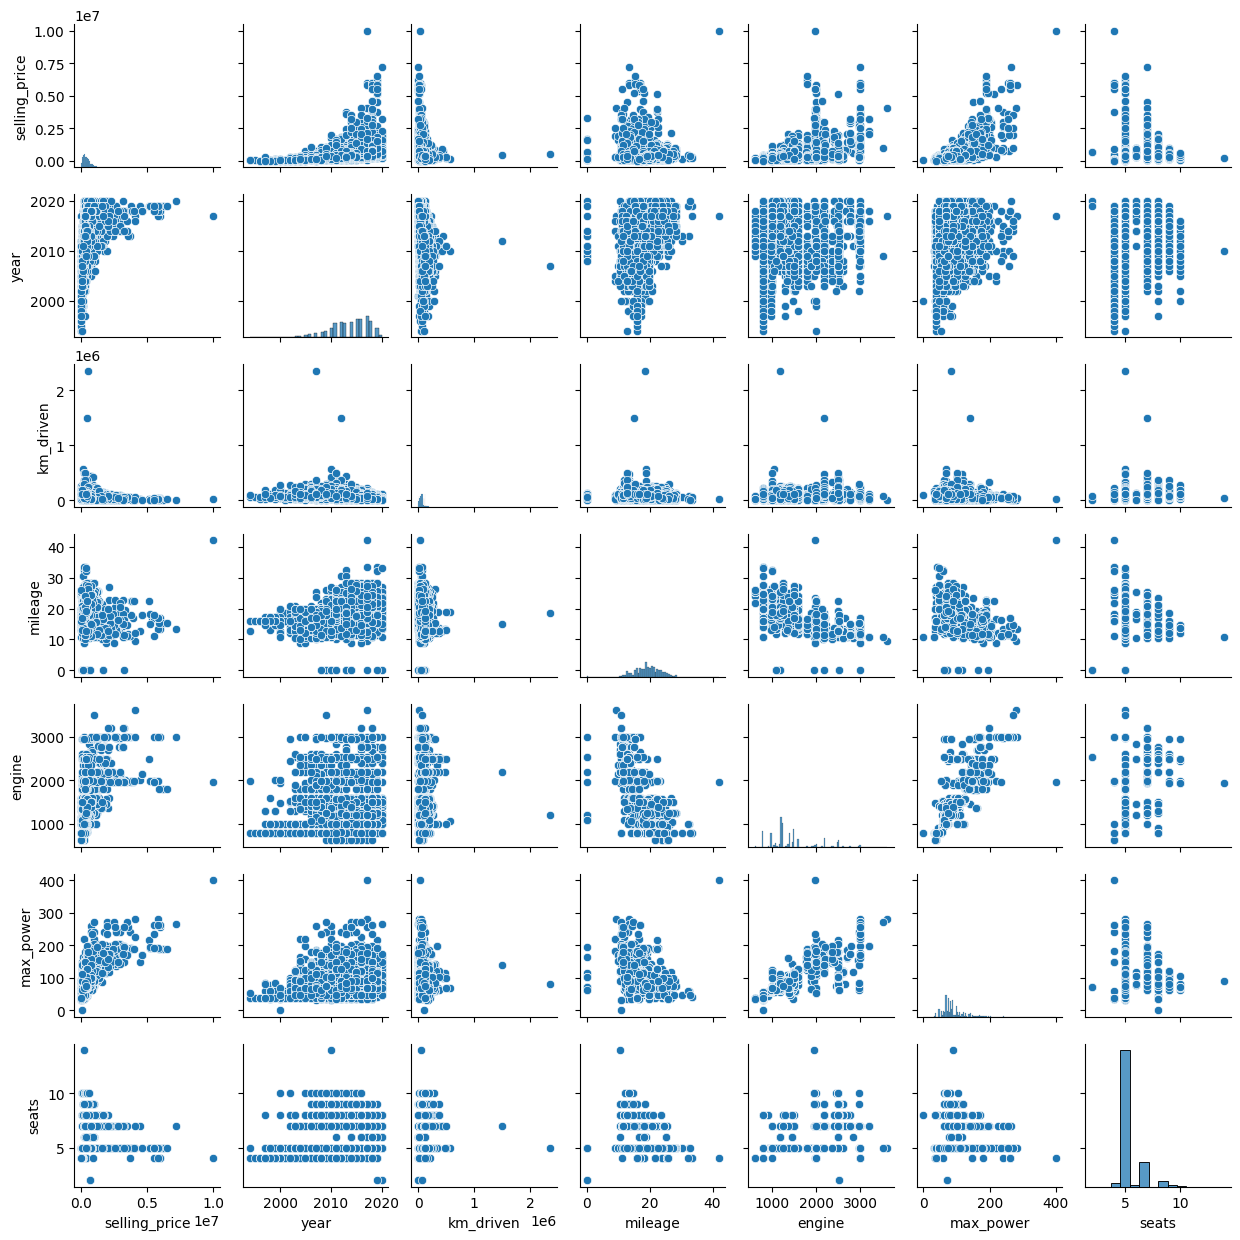

In [43]:
import seaborn as sns

# Select relevant numerical columns for the pair plot
numerical_cols = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Create a pair plot
sns.pairplot(df[numerical_cols],height=1.8)
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_test, predicted):
    mae = mean_absolute_error(y_test, predicted)
    rmse = np.sqrt(mean_squared_error(y_test, predicted))
    r2 = r2_score(y_test, predicted)

    print("Regression Metrics:")
    print(f"MAE  : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
evaluate_model(y_test,lr_predicted)


Regression Metrics:
MAE  : 183548.45
RMSE : 355147.05
R²   : 0.6064


**IMPROVING MODEL**

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and train the model
rf = RandomForestRegressor(
    n_estimators=500,    # number of trees
    random_state=42,
    n_jobs=-1            # use all CPU cores for speed
)
 #no matter scaling is done for tree based models!!!!!
rf.fit(x_train, y_train)

# Predictions
rf_predicted = rf.predict(x_test)
evaluate_model(y_test,rf_predicted)

Regression Metrics:
MAE  : 77212.49
RMSE : 143540.69
R²   : 0.9357


**bHYPER PARAMETER TUNING FOR RANDOM FOREST**

In [59]:
import pickle as pk
pk.dump(rf,open('model.pkl','wb'))

In [60]:
model=pk.load(open('model.pkl','rb'))

In [68]:
example_input=pd.DataFrame([8,2025,1,2,3,1,1,18.99,1200.0,109.96,5.0],['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

In [69]:
carprice=rf.predict(example_input.T)
print(carprice)

[1161171.99]
